In [1]:
#Importing libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
#Loading Data
retail = pd.read_csv('OnlineRetail (1).csv', index_col=False)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-1-2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-1-2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-1-2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-1-2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-1-2010 8:26,3.39,17850.0,United Kingdom


In [2]:
#Checking of rows and Columns
rows = len(retail.axes[0])
columns = len(retail.axes[1])
print("Number of Rows:",rows)
print("Number of Columns:",columns)

Number of Rows: 541909
Number of Columns: 8


In [3]:
#Checking of null values
missing_values_count = retail.isnull().sum()
missing_values_count[0:8]

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
#Data Cleaning and Manipulation
retail['Cancelled'] = retail['InvoiceNo'].str.find('C', start = 0)
retail['Description'] = retail['Description'].fillna('None')
retail['Description'] = retail['Description'].str.strip()
retail['CustomerID'] = retail['CustomerID'].fillna('0')

In [5]:
#Checking of null values
missing_values_count = retail.isnull().sum()
missing_values_count[0:8]

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
#Checking of Dtypes
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
 8   Cancelled    541909 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 37.2+ MB


In [7]:
#Data Cleaning and Manipulaton 
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['Year'] = pd.to_datetime(retail['InvoiceDate']).dt.strftime('%Y')
retail['Month'] = pd.to_datetime(retail['InvoiceDate']).dt.strftime('%m')
retail['CustomerID'] = retail['CustomerID'].astype(int)
retail['Total_Sales'] = retail['Quantity']*retail['UnitPrice']

In [8]:
#Checking Dtypes
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
 8   Cancelled    541909 non-null  int64         
 9   Year         541909 non-null  object        
 10  Month        541909 non-null  object        
 11  Total_Sales  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 47.5+ MB


In [9]:
retail.duplicated('Description')

0         False
1         False
2         False
3         False
4         False
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

In [10]:
retail.drop_duplicates('Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,Year,Month,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,-1,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,-1,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
535327,581204,85104,????damages????,-355,2011-12-07 18:32:00,0.00,0,United Kingdom,-1,2011,12,-0.00
535329,581206,21693,mixed up,-87,2011-12-07 18:34:00,0.00,0,United Kingdom,-1,2011,12,-0.00
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.00,0,United Kingdom,-1,2011,12,-0.00
537621,581334,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,2011-12-08 12:07:00,2.95,17841,United Kingdom,-1,2011,12,11.80


In [11]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,Year,Month,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,-1,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,-1,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34


In [14]:
#top popular items saled globally

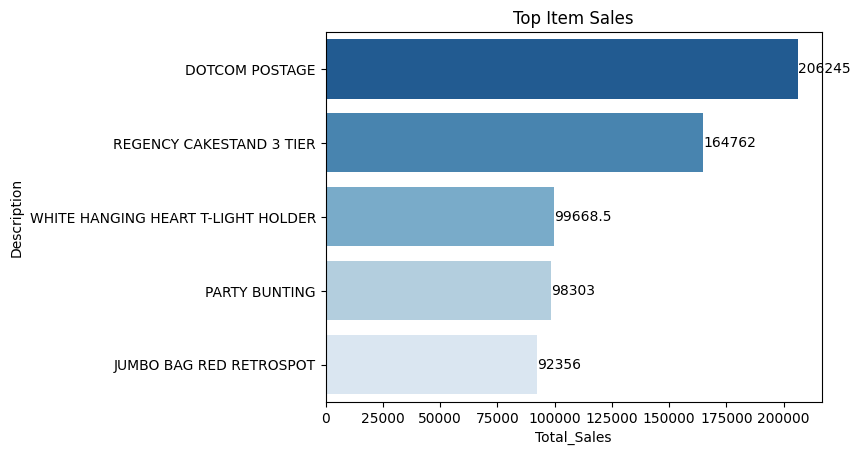

In [15]:
total_sales_per_category = retail.groupby('Description')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_category.head(5), y='Description',x='Total_Sales',palette = 'Blues_r')
plt.title("Top Item Sales")
for i in z.containers:
    z.bar_label(i,)
    #top items saled globally

In [16]:
retail.groupby('Description').count()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,Year,Month,Total_Sales
Description,,,,,,,,,,,
*Boombox Ipod Classic,1,1,1,1,1,1,1,1,1,1,1
*USB Office Mirror Ball,2,2,2,2,2,2,2,2,2,2,2
10 COLOUR SPACEBOY PEN,327,327,327,327,327,327,327,327,327,327,327
12 COLOURED PARTY BALLOONS,170,170,170,170,170,170,170,170,170,170,170
12 DAISY PEGS IN WOOD BOX,84,84,84,84,84,84,84,84,84,84,84
...,...,...,...,...,...,...,...,...,...,...,...
wrongly marked carton 22804,1,1,1,1,1,1,1,1,1,1,1
wrongly marked. 23343 in box,1,1,1,1,1,1,1,1,1,1,1
wrongly sold (22719) barcode,1,1,1,1,1,1,1,1,1,1,1


In [17]:
retail.groupby('Description').count()['Quantity']

Description
*Boombox Ipod Classic             1
*USB Office Mirror Ball           2
10 COLOUR SPACEBOY PEN          327
12 COLOURED PARTY BALLOONS      170
12 DAISY PEGS IN WOOD BOX        84
                               ... 
wrongly marked carton 22804       1
wrongly marked. 23343 in box      1
wrongly sold (22719) barcode      1
wrongly sold as sets              1
wrongly sold sets                 1
Name: Quantity, Length: 4212, dtype: int64

In [18]:
retail.groupby('Description').count()['Quantity'].reset_index()

,Description,Quantity
0,*Boombox Ipod Classic,1
1,*USB Office Mirror Ball,2
2,10 COLOUR SPACEBOY PEN,327
3,12 COLOURED PARTY BALLOONS,170
4,12 DAISY PEGS IN WOOD BOX,84
...,...,...
4207,wrongly marked carton 22804,1
4208,wrongly marked. 23343 in box,1
4209,wrongly sold (22719) barcode,1
4210,wrongly sold as sets,1


In [19]:
net_quantity_df=retail.groupby('Description').mean()['Quantity'].reset_index()
net_quantity_df.rename(columns={'Quantity':'Net Quantity'},inplace=True)
net_quantity_df.head()

C:\Users\kondaparthy vishal\AppData\Local\Temp\ipykernel_17468\603392963.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  net_quantity_df=retail.groupby('Description').mean()['Quantity'].reset_index()


,Description,Net Quantity
0,*Boombox Ipod Classic,1.000000
1,*USB Office Mirror Ball,1.000000
2,10 COLOUR SPACEBOY PEN,19.547401
3,12 COLOURED PARTY BALLOONS,12.558824
4,12 DAISY PEGS IN WOOD BOX,4.154762


In [20]:
quantity_df=retail.groupby('Description').count()['Quantity'].reset_index()

In [21]:
popular_df = quantity_df.merge(net_quantity_df,on = 'Description')
popular_df[popular_df['Quantity']>=100]

,Description,Quantity,Net Quantity
2,10 COLOUR SPACEBOY PEN,327,19.547401
3,12 COLOURED PARTY BALLOONS,170,12.558824
5,12 EGG HOUSE PAINTED WOOD,100,1.480000
7,12 IVORY ROSE PEG PLACE SETTINGS,150,6.453333
8,12 MESSAGE CARDS WITH ENVELOPES,265,6.562264
...,...,...,...
4082,ZINC METAL HEART DECORATION,552,10.704710
4087,ZINC T-LIGHT HOLDER STAR LARGE,170,12.052941
4089,ZINC T-LIGHT HOLDER STARS SMALL,278,18.147482
4091,ZINC WILLIE WINKIE CANDLE STICK,274,10.667883


In [22]:
popular_df=popular_df[popular_df['Quantity']>=100].sort_values('Net Quantity',ascending=False)
popular_df

,Description,Quantity,Net Quantity
3999,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708
576,BROCADE RING PURSE,245,94.093878
1477,GIRLS ALPHABET IRON ON PATCHES,148,93.797297
247,"ASSORTED FLOWER COLOUR ""LEIS""",111,92.927928
2150,MINI PAINT SET VINTAGE,390,67.787179
...,...,...,...
1087,DOTCOM POSTAGE,709,0.997179
670,CARRIAGE,143,0.979021
3004,ROTATING SILVER ANGELS T-LIGHT HLDR,475,0.210526
2294,None,1454,-9.359697


In [23]:
popular_df.merge(retail,on='Description')

,Description,Quantity_x,Net Quantity,InvoiceNo,StockCode,Quantity_y,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,Year,Month,Total_Sales
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708,536615,84077,48,2010-12-02 10:09:00,0.29,14047,United Kingdom,-1,2010,12,13.92
1,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708,536618,84077,48,2010-12-02 10:17:00,0.29,17017,United Kingdom,-1,2010,12,13.92
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708,536830,84077,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom,-1,2010,12,518.40
3,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708,536839,84077,288,2010-12-02 18:25:00,0.21,15093,United Kingdom,-1,2010,12,60.48
4,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708,536856,84077,48,2010-12-03 10:26:00,0.29,13370,United Kingdom,-1,2010,12,13.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465158,check,159,-75.660377,581202,23404,41,2011-12-07 18:30:00,0.00,0,United Kingdom,-1,2011,12,0.00
465159,check,159,-75.660377,581208,72801C,-10,2011-12-07 18:35:00,0.00,0,United Kingdom,-1,2011,12,-0.00
465160,check,159,-75.660377,581210,23395,-26,2011-12-07 18:36:00,0.00,0,United Kingdom,-1,2011,12,-0.00
465161,check,159,-75.660377,581211,22142,14,2011-12-07 18:36:00,0.00,0,United Kingdom,-1,2011,12,0.00


In [24]:
retail.groupby('CustomerID').count()['Quantity'].reset_index()

,CustomerID,Quantity
0,0,135080
1,12346,2
2,12347,182
3,12348,31
4,12349,73
...,...,...
4368,18280,10
4369,18281,7
4370,18282,13
4371,18283,756


In [25]:
x=retail.groupby('CustomerID').count()['Quantity']>100
pro=x[x].index
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,Year,Month,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,-1,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,-1,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,-1,2011,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,-1,2011,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,-1,2011,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,-1,2011,12,16.60


In [26]:
x=retail.groupby('CustomerID').count()['Quantity']>100
pro=x[x].index

In [27]:
filtered_rating = retail[retail['CustomerID'].isin(pro)]
filtered_rating.groupby('Description').count()['Quantity']

Description
*Boombox Ipod Classic             1
*USB Office Mirror Ball           2
10 COLOUR SPACEBOY PEN          250
12 COLOURED PARTY BALLOONS      133
12 DAISY PEGS IN WOOD BOX        74
                               ... 
wrongly marked carton 22804       1
wrongly marked. 23343 in box      1
wrongly sold (22719) barcode      1
wrongly sold as sets              1
wrongly sold sets                 1
Name: Quantity, Length: 4152, dtype: int64

In [28]:
y = filtered_rating.groupby('Description').count()['Quantity']>=50
famous_pro = y[y].index
famous_pro

Index(['10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS',
       '12 DAISY PEGS IN WOOD BOX', '12 EGG HOUSE PAINTED WOOD',
       '12 IVORY ROSE PEG PLACE SETTINGS', '12 MESSAGE CARDS WITH ENVELOPES',
       '12 PENCIL SMALL TUBE WOODLAND', '12 PENCILS SMALL TUBE RED RETROSPOT',
       '12 PENCILS SMALL TUBE SKULL', '12 PENCILS TALL TUBE POSY',
       ...
       'ZINC FOLKART SLEIGH BELLS', 'ZINC HEART FLOWER T-LIGHT HOLDER',
       'ZINC HEART LATTICE T-LIGHT HOLDER', 'ZINC HERB GARDEN CONTAINER',
       'ZINC METAL HEART DECORATION', 'ZINC SWEETHEART WIRE LETTER RACK',
       'ZINC T-LIGHT HOLDER STAR LARGE', 'ZINC T-LIGHT HOLDER STARS SMALL',
       'ZINC WILLIE WINKIE  CANDLE STICK', 'check'],
      dtype='object', name='Description', length=2047)

In [29]:
filtered_rating['Description'].isin(famous_pro)

0         True
1         True
2         True
3         True
4         True
          ... 
541889    True
541890    True
541891    True
541892    True
541893    True
Name: Description, Length: 430698, dtype: bool

In [30]:
final_r = filtered_rating[filtered_rating['Description'].isin(famous_pro)]
final_r

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,Year,Month,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,-1,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,-1,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,-1,2011,12,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,-1,2011,12,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,-1,2011,12,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,-1,2011,12,214.80


In [31]:
pt = final_r.pivot_table(index='Description',columns='CustomerID',values='Quantity')
pt

CustomerID,0,12347,12357,12359,12360,12362,12370,12378,12380,12395,...,18226,18229,18231,18235,18241,18245,18257,18260,18272,18283
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,3.766234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5
12 COLOURED PARTY BALLOONS,1.875000,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 DAISY PEGS IN WOOD BOX,1.466667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN
12 EGG HOUSE PAINTED WOOD,1.085714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 IVORY ROSE PEG PLACE SETTINGS,3.859649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC SWEETHEART WIRE LETTER RACK,1.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZINC T-LIGHT HOLDER STAR LARGE,1.578947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZINC T-LIGHT HOLDER STARS SMALL,5.270270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
pt.fillna(0,inplace=True)
pt

CustomerID,0,12347,12357,12359,12360,12362,12370,12378,12380,12395,...,18226,18229,18231,18235,18241,18245,18257,18260,18272,18283
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,3.766234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.5
12 COLOURED PARTY BALLOONS,1.875000,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 DAISY PEGS IN WOOD BOX,1.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
12 EGG HOUSE PAINTED WOOD,1.085714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 IVORY ROSE PEG PLACE SETTINGS,3.859649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC SWEETHEART WIRE LETTER RACK,1.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC T-LIGHT HOLDER STAR LARGE,1.578947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC T-LIGHT HOLDER STARS SMALL,5.270270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
similarity_scores =cosine_similarity(pt)
similarity_scores.shape

(2047, 2047)

In [34]:
def recommend(product_name):
    #index fetch
    index = np.where(pt.index==product_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_items:
        print(pt.index[i[0]])

In [35]:
recommend('WATERING CAN GARDEN MARKER')

DAISY GARDEN MARKER
DOORSTOP RETROSPOT HEART
ILLUSTRATED CAT BOWL
BIRDHOUSE GARDEN MARKER
METAL SIGN HER DINNER IS SERVED


In [36]:
recommend('DAISY GARDEN MARKER')

WATERING CAN GARDEN MARKER
DOORSTOP RETROSPOT HEART
BIRDHOUSE GARDEN MARKER
ILLUSTRATED CAT BOWL
METAL SIGN HER DINNER IS SERVED


In [37]:
recommend('ZINC T-LIGHT HOLDER STAR LARGE')



ANGEL DECORATION PAINTED ZINC
GINGHAM HEART DECORATION
PARTY CONES CANDY DECORATION
PLACE SETTING WHITE STAR
CARD HOLDER LOVE BIRD SMALL


In [38]:
recommend('CHILDRENS CUTLERY DOLLY GIRL')

SPACEBOY BEAKER
DOLLY GIRL BEAKER
SPACEBOY MINI BACKPACK
WOODLAND MINI BACKPACK
FOOD CONTAINER SET 3 LOVE HEART


In [39]:
recommend('ASSORTED COLOUR BIRD ORNAMENT')

SET OF 4 NAPKIN CHARMS CUTLERY
JINGLE BELL HEART ANTIQUE SILVER
WHITE SKULL HOT WATER BOTTLE
SET/3 RED GINGHAM ROSE STORAGE BOX
POPCORN HOLDER


In [40]:
recommend('MINI JIGSAW SPACEBOY')

MINI JIGSAW DOLLY GIRL
SPACEBOY ROCKET LOLLY MAKERS
MINI JIGSAW PURDEY
GIRLS VINTAGE TIN SEASIDE BUCKET
MINI PLAYING CARDS GYMKHANA
